In [47]:
# This script is for OSL Modelling
# Take Dataset 3 Buffalo for example

In [48]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
X_sociodemo_std_test_passed_2 = pd.read_csv("../Data/01 Processed Dataset/Complete_BUF.csv")
X_sociodemo_std_test_passed_1 = X_sociodemo_std_test_passed_2.set_index('GEOID')
y = X_sociodemo_std_test_passed_1.pop('obesity_cr')

In [50]:
X_sociodemo_std_test_passed_1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36029000500,0.062950,0.000000,0.000000,0.0,0.153477,0.432854,0.361005,0.118106,0.126499,0.083933,...,0.063401,0.414311,0.331218,50800,1939,0.376904,266.853532,0.243330,0.218783,0.561366
36029000700,0.004076,0.000000,0.007337,0.0,0.029076,0.454891,0.472657,0.165761,0.135870,0.111685,...,0.047530,0.062044,0.100134,125300,1944,0.242323,3437.581736,0.421502,0.413855,0.769681
36029000900,0.005390,0.000000,0.005390,0.0,0.180763,0.484245,0.391390,0.207711,0.227612,0.093284,...,0.078431,0.097015,0.135734,93000,1939,0.445060,4384.936326,0.288562,0.307975,0.621196
36029001000,0.092095,0.034719,0.016137,0.0,0.055094,0.515729,0.427102,0.193154,0.168867,0.082967,...,0.081107,0.207792,0.317936,79400,1939,0.520183,2932.488101,0.362364,0.232738,0.713865
36029001100,0.057063,0.015310,0.032359,0.0,0.105428,0.525052,0.324919,0.186152,0.134308,0.092206,...,0.071886,0.213184,0.239050,74300,1939,0.543430,1885.467988,0.342703,0.188468,0.791351


In [51]:
len(X_sociodemo_std_test_passed_1), len(y)

(77, 77)

In [52]:
len(X_sociodemo_std_test_passed_1.columns), X_sociodemo_std_test_passed_1.columns

(24,
 Index(['% Black', '% Ame Indi and AK Native', '% Asian',
        '% Nati Hawa and Paci Island', '% Hispanic or Latino', '% male',
        '% married', '% age 18-29', '% age 30-39', '% age 40-49', '% age 50-59',
        '% age >=60', '% <highschool', 'median income', '% unemployment',
        '% below poverty line', '% food stamp/SNAP', 'median value units built',
        'median year units built', '% renter-occupied housing units',
        'population density', 'fafood', 'fitness', 'park'],
       dtype='object'))

In [53]:
y.head()

GEOID
36029000500    38.6
36029000700    27.7
36029000900    30.8
36029001000    32.4
36029001100    33.4
Name: obesity_cr, dtype: float64

In [54]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

X_sociodemo_std_test_passed_stats = X_sociodemo_std_test_passed_1.describe().transpose()
X_sociodemo_std_test_passed_3 = standarize_data(X_sociodemo_std_test_passed_1,X_sociodemo_std_test_passed_stats)


In [55]:
X_sociodemo_std_test_passed_3.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36029000500,-0.972377,-0.481018,-0.665740,-0.268638,0.340632,-0.814688,0.477952,-1.097825,-0.217017,-0.874407,...,-0.392218,0.771001,-0.118599,-0.672453,-0.278485,-1.471619,-1.783293,-0.799178,-0.124349,0.016137
36029000700,-1.149594,-0.481018,-0.569512,-0.268638,-0.745353,-0.378082,1.796983,-0.540475,-0.001039,0.173066,...,-0.690145,-1.765677,-1.507320,0.142833,0.455877,-2.391484,0.204783,1.491490,2.475543,1.646691
36029000900,-1.145640,-0.481018,-0.595051,-0.268638,0.578828,0.203479,0.836913,-0.049846,2.113441,-0.521472,...,-0.110050,-1.513850,-1.293376,-0.210640,-0.278485,-1.005767,0.798783,-0.217646,1.064383,0.484449
36029001000,-0.884647,3.097418,-0.454097,-0.268638,-0.518227,0.827236,1.258804,-0.220101,0.759490,-0.910878,...,-0.059818,-0.716144,-0.198420,-0.359471,-0.278485,-0.492296,-0.111916,0.731182,0.061637,1.209800
36029001100,-0.990095,1.096935,-0.241336,-0.268638,-0.078823,1.011938,0.051631,-0.301996,-0.037040,-0.562145,...,-0.232922,-0.677319,-0.672493,-0.415282,-0.278485,-0.333404,-0.768407,0.478405,-0.528382,1.816315


In [56]:
#Sociodemographic predictors
#fit OLS model
X_sociodemo_std_test_passed = X_sociodemo_std_test_passed_3.drop(columns=['fitness','park','fafood'])
X_sociodemo_std_test_passed_constant = sm.add_constant(X_sociodemo_std_test_passed)

model = sm.OLS(y, X_sociodemo_std_test_passed_constant).fit() # this is an OLS object
model.summary2()

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                   Adj. R-squared:          0.966   
Dependent Variable:      obesity_cr            AIC:                     275.4788
Date:                    2022-04-20 18:49      BIC:                     327.0426
No. Observations:        77                    Log-Likelihood:          -115.74 
Df Model:                21                    F-statistic:             104.4   
Df Residuals:            55                    Prob (F-statistic):      8.14e-37
R-squared:               0.976                 Scale:                   1.6567  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           37.6948   0.1467 256.9851 0.0000 37.4009 37.9888
% Black                          3.5483   0.3304  10.7392 0.0000  2.8862  4.2105
% Ame Indi and AK Native         0.0163   0.1635   0.0996 0.9210 -0.3114  0.3440
% Asian                         -0.0486   0.2197  -0.2214 0.8256 -0.4889  0.3916
% Nati Hawa and Paci Island     -0.0818   0.1693  -0.4830 0.6310 -0.4211  0.2575
% Hispanic or Latino            -0.0828   0.3190  -0.2597 0.7961 -0.7222  0.5565
% male                           0.1574   0.2120   0.7422 0.4611 -0.2676  0.5823
% married                       -0.4528   0.3244  -1.3957 0.1684 -1.1029  0.1973
% age 18-29                     -1.7670   0.4257  -4.1513 0.0001 -2.6200 -0.9140
% age 30-39                      0.2897   0.3286   0.8815 0.3819 -0.3689  0.9482
% age 40-49                      0.1448   0.2233   0.6482 0.5196 -0.3028  0.5923
% age 50-59                     -0.1163   0.2856  -0.4071 0.6855 -0.6886  0.4561
% age >=60                      -0.4864   0.3283  -1.4815 0.1442 -1.1444  0.1716
% <highschool                    0.5543   0.3299   1.6804 0.0986 -0.1068  1.2155
median income                   -0.8351   0.4034  -2.0702 0.0431 -1.6436 -0.0267
% unemployment                   0.1580   0.2619   0.6031 0.5489 -0.3670  0.6829
% below poverty line             1.4722   0.3729   3.9486 0.0002  0.7250  2.2194
% food stamp/SNAP                0.2935   0.5371   0.5464 0.5870 -0.7829  1.3698
median value units built        -0.7857   0.3202  -2.4540 0.0173 -1.4274 -0.1441
median year units built          0.0712   0.1902   0.3743 0.7096 -0.3099  0.4523
% renter-occupied housing units  0.1585   0.3474   0.4563 0.6499 -0.5376  0.8546
population density              -0.7508   0.2008  -3.7387 0.0004 -1.1532 -0.3483
--------------------------------------------------------------------------------
Omnibus:                    0.490             Durbin-Watson:               1.778
Prob(Omnibus):              0.783             Jarque-Bera (JB):            0.578
Skew:                       -0.178            Prob(JB):                    0.749
Kurtosis:                   2.768             Condition No.:               12   
================================================================================

"""

In [57]:
len(X_sociodemo_std_test_passed_constant.columns), X_sociodemo_std_test_passed_constant.columns
#y.head()

(22,
 Index(['const', '% Black', '% Ame Indi and AK Native', '% Asian',
        '% Nati Hawa and Paci Island', '% Hispanic or Latino', '% male',
        '% married', '% age 18-29', '% age 30-39', '% age 40-49', '% age 50-59',
        '% age >=60', '% <highschool', 'median income', '% unemployment',
        '% below poverty line', '% food stamp/SNAP', 'median value units built',
        'median year units built', '% renter-occupied housing units',
        'population density'],
       dtype='object'))

In [58]:
# RMSE of the stats model
from statsmodels.tools.eval_measures import rmse
# now generate predictions
ypred = model.predict(X_sociodemo_std_test_passed_constant)
# calc rmse of the model without diet and physical activity info
RMSE = rmse(y, ypred)
RMSE

1.087814648565742

In [59]:
len(X_sociodemo_std_test_passed_3.columns)

24

In [60]:
# now let's add diet and physical activity measurements
# First VIF test with diet and physical activity measurements
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_sociodemo_std_test_passed_3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature        VIF
0                           % Black   5.294437
1          % Ame Indi and AK Native   1.241109
2                           % Asian   2.305386
3       % Nati Hawa and Paci Island   1.362700
4              % Hispanic or Latino   4.680160
5                            % male   2.075050
6                         % married   5.107623
7                       % age 18-29   8.376406
8                       % age 30-39   5.077011
9                       % age 40-49   2.366724
10                      % age 50-59   3.799514
11                       % age >=60   5.029918
12                    % <highschool   5.252586
13                    median income   7.757333
14                   % unemployment   3.261382
15             % below poverty line   6.540022
16                % food stamp/SNAP  13.301933
17         median value units built   5.556940
18          median year units built   1.698058
19  % renter-occupied housing units   5.604963
20           

In [61]:
# OLS with adding with diet and physical activity measurements
X_sociodemo_std_test_passed_3_constant = sm.add_constant(X_sociodemo_std_test_passed_3)
model_complete = sm.OLS(y, X_sociodemo_std_test_passed_3_constant).fit() 
summary_complete = model_complete.summary2()
summary_complete

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                   OLS                   Adj. R-squared:          0.965   
Dependent Variable:      obesity_cr            AIC:                     280.1699
Date:                    2022-04-20 18:49      BIC:                     338.7650
No. Observations:        77                    Log-Likelihood:          -115.08 
Df Model:                24                    F-statistic:             87.92   
Df Residuals:            52                    Prob (F-statistic):      5.36e-34
R-squared:               0.976                 Scale:                   1.7227  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           37.6948   0.1496 252.0111 0.0000 37.3947 37.9950
% Black                          3.5307   0.3464  10.1917 0.0000  2.8355  4.2258
% Ame Indi and AK Native         0.0154   0.1677   0.0920 0.9270 -0.3211  0.3520
% Asian                         -0.0841   0.2286  -0.3678 0.7145 -0.5428  0.3746
% Nati Hawa and Paci Island     -0.0763   0.1758  -0.4342 0.6659 -0.4290  0.2764
% Hispanic or Latino            -0.0823   0.3257  -0.2527 0.8015 -0.7359  0.5713
% male                           0.1607   0.2169   0.7411 0.4619 -0.2745  0.5959
% married                       -0.4479   0.3403  -1.3163 0.1939 -1.1307  0.2349
% age 18-29                     -1.7860   0.4357  -4.0989 0.0001 -2.6604 -0.9117
% age 30-39                      0.2533   0.3392   0.7468 0.4586 -0.4274  0.9341
% age 40-49                      0.1242   0.2316   0.5364 0.5939 -0.3405  0.5890
% age 50-59                     -0.1283   0.2935  -0.4373 0.6637 -0.7172  0.4606
% age >=60                      -0.5141   0.3377  -1.5226 0.1339 -1.1917  0.1634
% <highschool                    0.5131   0.3451   1.4870 0.1430 -0.1793  1.2055
median income                   -0.8983   0.4193  -2.1423 0.0369 -1.7398 -0.0569
% unemployment                   0.1544   0.2719   0.5679 0.5726 -0.3912  0.7000
% below poverty line             1.4296   0.3850   3.7129 0.0005  0.6570  2.2022
% food stamp/SNAP                0.3141   0.5491   0.5721 0.5697 -0.7877  1.4160
median value units built        -0.8326   0.3549  -2.3460 0.0228 -1.5448 -0.1204
median year units built          0.0784   0.1962   0.3998 0.6909 -0.3152  0.4721
% renter-occupied housing units  0.1380   0.3564   0.3870 0.7003 -0.5773  0.8532
population density              -0.7433   0.2115  -3.5149 0.0009 -1.1677 -0.3190
fafood                          -0.1673   0.1914  -0.8739 0.3862 -0.5514  0.2168
fitness                          0.0294   0.2223   0.1321 0.8954 -0.4167  0.4754
park                            -0.0037   0.1939  -0.0193 0.9847 -0.3929  0.3854
--------------------------------------------------------------------------------
Omnibus:                    0.882             Durbin-Watson:               1.855
Prob(Omnibus):              0.644             Jarque-Bera (JB):            0.935
Skew:                       -0.241            Prob(JB):                    0.627
Kurtosis:                   2.756             Condition No.:               13   
================================================================================

"""

In [62]:
# now generate predictions
from statsmodels.tools.eval_measures import rmse
ypred2 = model_complete.predict(X_sociodemo_std_test_passed_3_constant)
# calc rmse of the model with diet and physical activity info
rmse = rmse(y,ypred2)
rmse

1.078607567162757

In [63]:
# cop is calculated for coefficient
coefficients1 = model_complete.params[1:].round(4)
coefficients11 = pd.DataFrame(coefficients1)
pvalue = model_complete.pvalues[1:]
pvalue1 = pd.DataFrame(pvalue)
cop = pd.merge(coefficients11, pvalue1, right_index = True, left_index = True)
cop[["0_x"]] = cop[["0_x"]].astype(str)

for i in range(len(cop)):
    if cop["0_y"][i] < 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "***"
    if cop["0_y"][i] < 0.01 and cop["0_y"][i] >= 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "**"
    if cop["0_y"][i] < 0.05 and cop["0_y"][i] >= 0.01:
        cop["0_x"][i] = cop["0_x"][i] + "*"

C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/4021656511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "***"
C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/4021656511.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "*"


In [64]:
cop

,0_x,0_y
% Black,3.5307***,5.374145e-14
% Ame Indi and AK Native,0.0154,9.270267e-01
% Asian,-0.0841,7.145415e-01
% Nati Hawa and Paci Island,-0.0763,6.659279e-01
% Hispanic or Latino,-0.0823,8.014913e-01
% male,0.1607,4.619478e-01
% married,-0.4479,1.938550e-01
% age 18-29,-1.786***,1.460549e-04
% age 30-39,0.2533,4.585674e-01
% age 40-49,0.1242,5.939436e-01


C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/1292274148.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/1292274148.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/1292274148.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

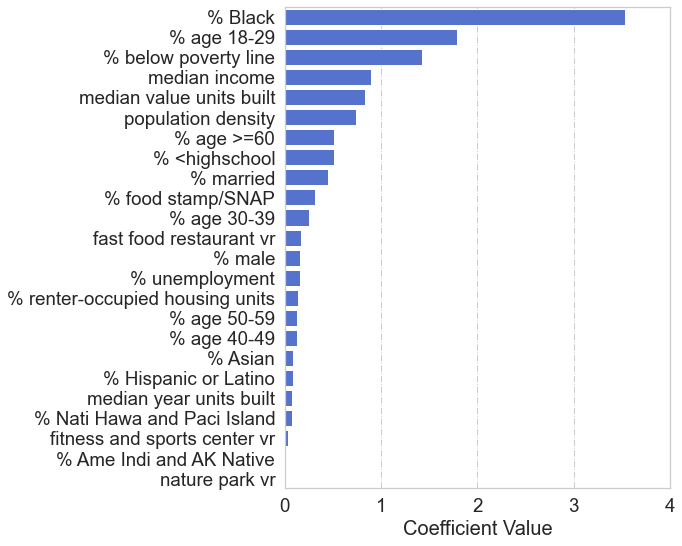

In [65]:
# Significant variables coef figure

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(0,4)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../OLS_coefficients_BUF.png",dpi=300)

C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/484780423.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/484780423.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/484780423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

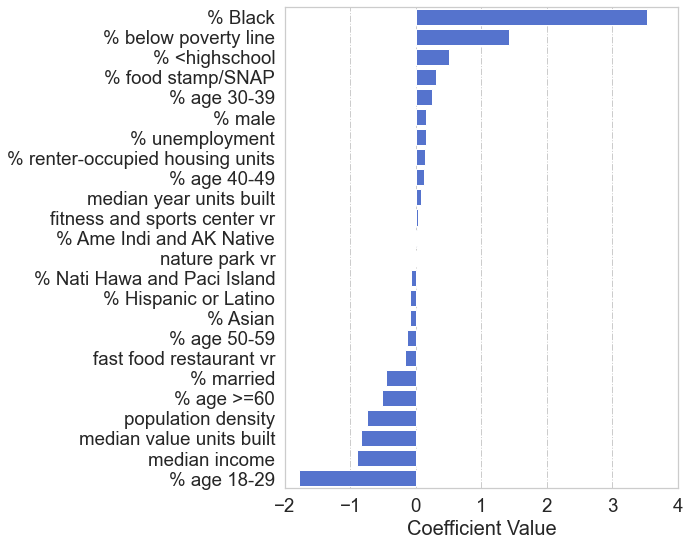

In [66]:
# Significant variables coef figure 2

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
# coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)
import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_BUF.png",dpi=300)

In [67]:
coef_data

,Feature,Coefficient
0,% Black,3.530655
15,% below poverty line,1.429563
12,% <highschool,0.513106
16,% food stamp/SNAP,0.314123
8,% age 30-39,0.253332
5,% male,0.160735
14,% unemployment,0.154404
19,% renter-occupied housing units,0.137958
9,% age 40-49,0.124249
18,median year units built,0.078436


In [68]:
coef_data_si = coef_data[((coef_data['Feature'] == '% Black') | (coef_data['Feature'] == '% age 18-29')| (coef_data['Feature'] == 'median income')| (coef_data['Feature'] == '% below poverty line')| (coef_data['Feature'] == 'median value units built')| (coef_data['Feature'] == 'population density'))]
coef_data_si.reset_index()

,index,Feature,Coefficient
0,0,% Black,3.530655
1,15,% below poverty line,1.429563
2,20,population density,-0.743329
3,17,median value units built,-0.832609
4,13,median income,-0.898346
5,7,% age 18-29,-1.786046


C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/640772616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data_si['Feature'][0] = '% renter-occupied housing units'


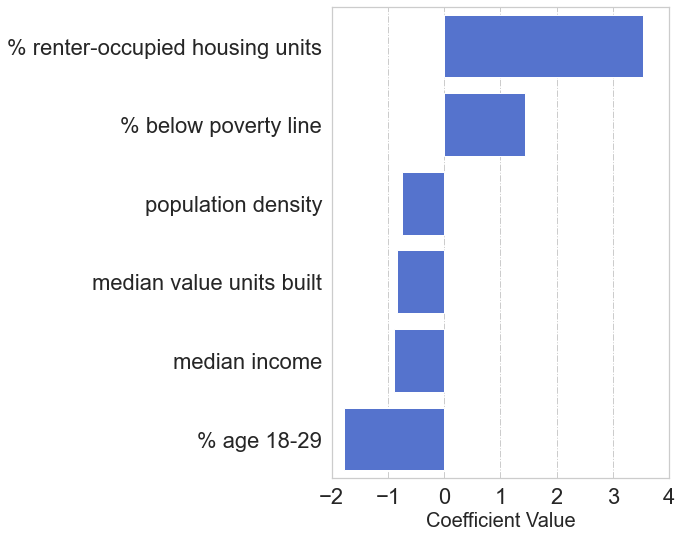

In [69]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)
coef_data_si['Feature'][0] = '% renter-occupied housing units'

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 2)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data_si, color = "royalblue")

plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)
import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_BUF1.png",dpi=300)

In [70]:
coef_data_si['Coefficient'] = 0

C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/3898430214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data_si['Coefficient'] = 0


In [71]:
coef_data_si

,Feature,Coefficient
0,% renter-occupied housing units,0
15,% below poverty line,0
20,population density,0
17,median value units built,0
13,median income,0
7,% age 18-29,0


C:\Users\ryanz\AppData\Local\Temp/ipykernel_9356/2084796670.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data_si['Feature'][0] = '% renter-occupied housing units'


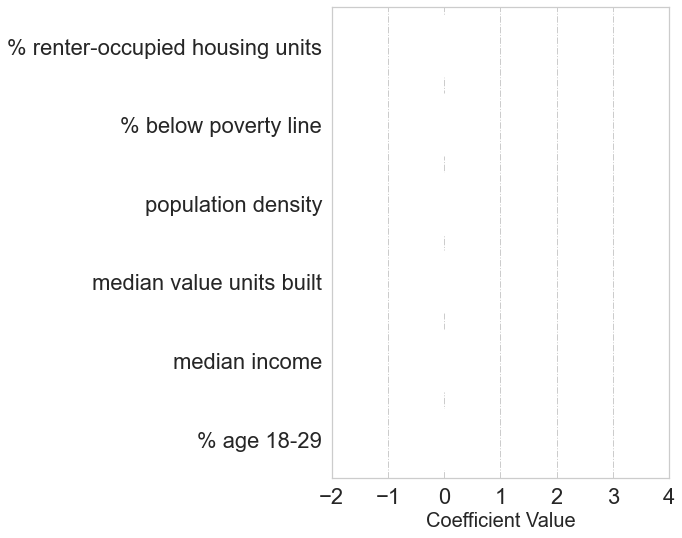

In [75]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)
coef_data_si['Feature'][0] = '% renter-occupied housing units'

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 2)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data_si, color = "royalblue")

plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)
import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_BUF2.png",dpi=300)

26.1
49.1
25.69965703098851
49.88459197861341


<Figure size 720x576 with 0 Axes>

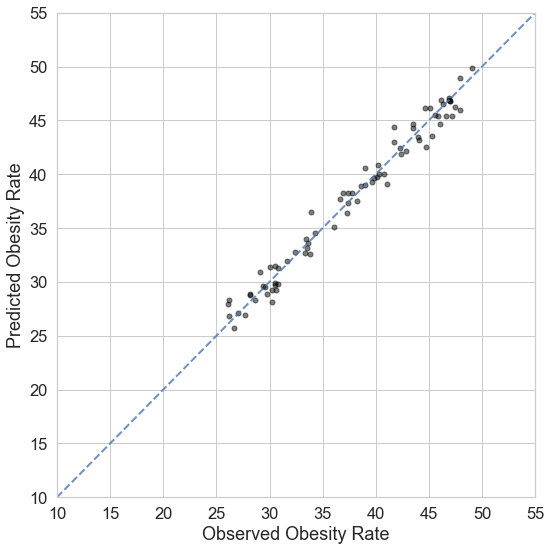

In [73]:
# Scatter and curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y))
print(np.max(y))
print(np.min(ypred2))
print(np.max(ypred2))

#scatter plot
lims = [10, 55]
prediction_scatter(y, ypred2, lims, "")
plt.tight_layout()
# plt.savefig("../OLS_pred_origin_BUF.png",dpi=300)